In [ ]:
import torch.nn as nn
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"

In [48]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000)

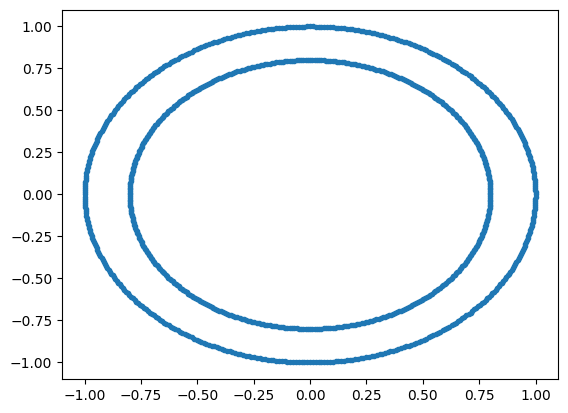

In [49]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],marker='.')

In [50]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_test = x_test.to(device)
x_train = x_train.to(device)
y_test = y_test.to(device)
y_train = y_train.to(device)


In [76]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=5),
    nn.Linear(in_features=5,out_features=1)
    ).to(device)


print(model_0.state_dict())

OrderedDict([('0.weight', tensor([[-0.0309, -0.1594],
        [-0.4711, -0.6049],
        [-0.6511, -0.4437],
        [-0.4395,  0.6529],
        [-0.4393,  0.5991]], device='cuda:0')), ('0.bias', tensor([ 0.0743,  0.3942,  0.1909, -0.2840,  0.5830], device='cuda:0')), ('1.weight', tensor([[-0.0666, -0.0458, -0.1155, -0.0298,  0.2487],
        [ 0.2307, -0.0917, -0.0700, -0.3777,  0.0514],
        [-0.2953,  0.2590,  0.2401, -0.2041,  0.1675],
        [ 0.2308, -0.2000, -0.0321,  0.2787, -0.1352],
        [-0.1046,  0.0573, -0.4097, -0.3050, -0.2947]], device='cuda:0')), ('1.bias', tensor([-0.4235,  0.1409, -0.0062, -0.2997, -0.2181], device='cuda:0')), ('2.weight', tensor([[ 0.1495,  0.0214,  0.4217, -0.3335, -0.1856]], device='cuda:0')), ('2.bias', tensor([0.2374], device='cuda:0'))])


In [77]:
with torch.inference_mode():
    y_pred = torch.sigmoid(model_0(x_test))

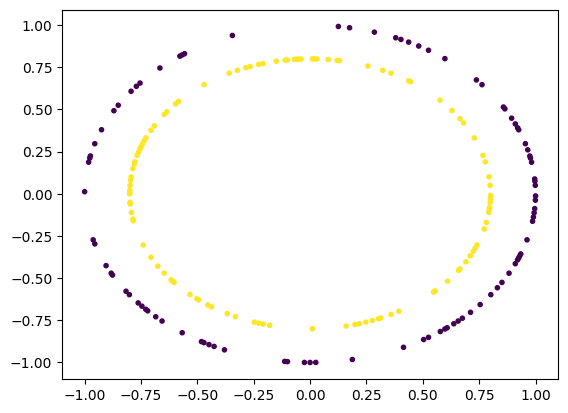

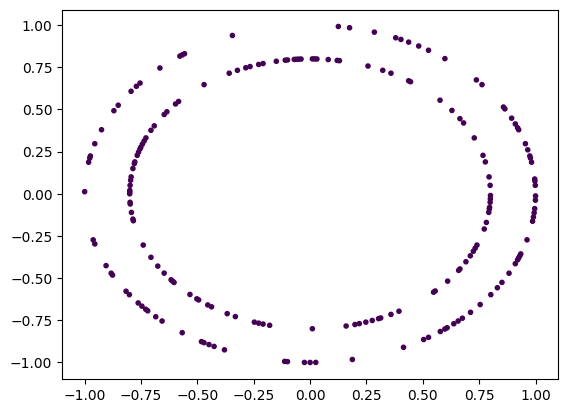

In [78]:
plt.scatter(x_test.to('cpu')[:,0],x_test.to('cpu')[:,1],c=y_test.to('cpu'),marker='.')
plt.show()
plt.scatter(x_test.to('cpu')[:,0],x_test.to('cpu')[:,1],c=y_pred.to('cpu').round(),marker='.')
plt.show()

In [79]:
loss_func = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [80]:
def accuracy(y_pred,y_test):
    ratio_acc = torch.eq(torch.round(torch.sigmoid(y_pred)),y_test).sum().item()
    return np.round(100*ratio_acc/y_test.size()[0],1)

In [81]:
y_pred_logits = []
loss_pred = []
acc_pred = []

In [82]:

for epochs  in range(1000):
    model_0.train()

    y_logits = model_0(x_train).squeeze()

    loss = loss_func(y_logits,y_train)

    acc = accuracy(y_logits,y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_0.eval()

    with torch.inference_mode():
        y_pred_logits.append(model_0(x_test).squeeze())
        loss_pred.append(loss_func(y_pred_logits[-1],y_test))
        acc_pred.append(accuracy(y_pred_logits[-1],y_test))

    if epochs%10==0:
        print(f'epoch: {epochs} ||| acc: {acc_pred[-1]}% ||| loss: {loss_pred[-1]}')

epoch: 0 ||| acc: 53.5% ||| loss: 0.7059741616249084
epoch: 10 ||| acc: 53.5% ||| loss: 0.7029319405555725
epoch: 20 ||| acc: 53.5% ||| loss: 0.700344979763031
epoch: 30 ||| acc: 53.5% ||| loss: 0.6981460452079773
epoch: 40 ||| acc: 53.5% ||| loss: 0.696278989315033
epoch: 50 ||| acc: 53.5% ||| loss: 0.6946964263916016
epoch: 60 ||| acc: 53.5% ||| loss: 0.6933587193489075
epoch: 70 ||| acc: 53.5% ||| loss: 0.6922320127487183
epoch: 80 ||| acc: 53.5% ||| loss: 0.6912875771522522
epoch: 90 ||| acc: 53.5% ||| loss: 0.6905006766319275
epoch: 100 ||| acc: 53.5% ||| loss: 0.6898502707481384
epoch: 110 ||| acc: 53.5% ||| loss: 0.6893182396888733
epoch: 120 ||| acc: 53.5% ||| loss: 0.6888887882232666
epoch: 130 ||| acc: 53.5% ||| loss: 0.6885482668876648
epoch: 140 ||| acc: 53.5% ||| loss: 0.6882851123809814
epoch: 150 ||| acc: 53.5% ||| loss: 0.6880889534950256
epoch: 160 ||| acc: 53.5% ||| loss: 0.6879507303237915
epoch: 170 ||| acc: 53.5% ||| loss: 0.6878628134727478
epoch: 180 ||| acc: 53.

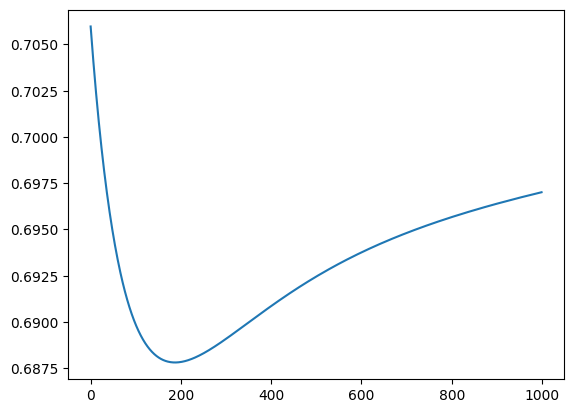

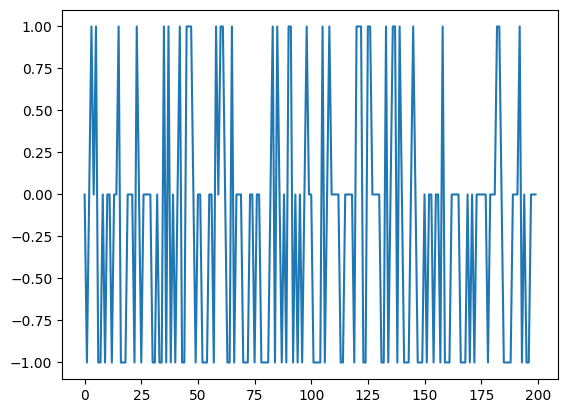

In [83]:
plt.plot([i.to('cpu') for i in loss_pred])
plt.show()
plt.plot(torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu')-y_test.to('cpu'))
plt.show()

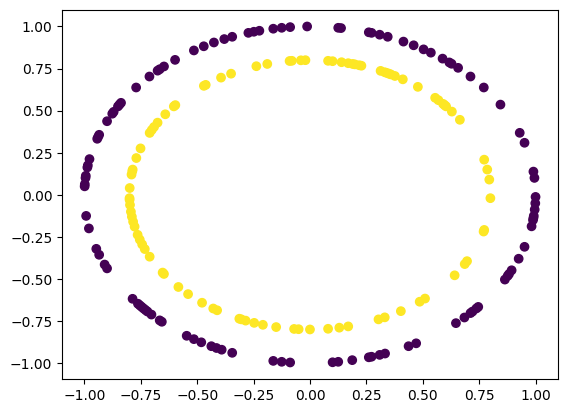

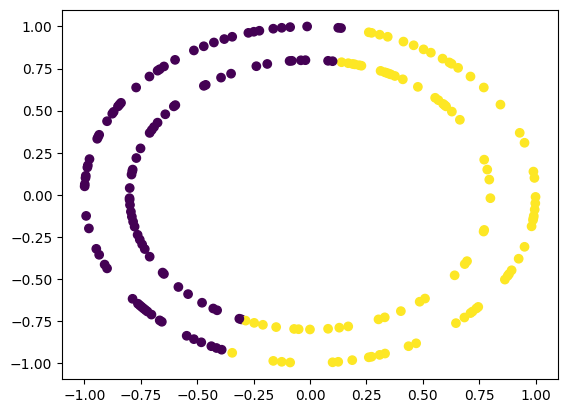

In [ ]:
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu').to('cpu'))
plt.show()

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10,bias=True),
    nn.Linear(in_features=10,out_features=10,bias=True),
    nn.Linear(in_features=10,out_features=1,bias=True)
    ).to(device)


# print(model_1.state_dict())

In [ ]:
loss_func = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [ ]:
y_pred_logits = []
loss_pred = []
acc_pred = []

In [ ]:

for epochs  in range(10000):
    model_1.train()

    y_logits = model_1(x_train).squeeze()

    loss = loss_func(y_logits,y_train)

    acc = accuracy(y_logits,y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model_0.eval()

    with torch.inference_mode():
        y_pred_logits.append(model_1(x_test).squeeze())
        loss_pred.append(loss_func(y_pred_logits[-1],y_test))
        acc_pred.append(accuracy(y_pred_logits[-1],y_test))

    if epochs%100==0:
        print(f'epoch: {epochs} ||| acc: {acc_pred[-1]}% ||| loss: {loss_pred[-1]}')

epoch: 0 ||| acc: 52.5% ||| loss: 0.6926348805427551
epoch: 100 ||| acc: 51.5% ||| loss: 0.6926988363265991
epoch: 200 ||| acc: 52.0% ||| loss: 0.6927781701087952
epoch: 300 ||| acc: 51.5% ||| loss: 0.692868173122406
epoch: 400 ||| acc: 51.0% ||| loss: 0.6929652094841003
epoch: 500 ||| acc: 50.0% ||| loss: 0.693066418170929
epoch: 600 ||| acc: 50.0% ||| loss: 0.6931694746017456
epoch: 700 ||| acc: 50.0% ||| loss: 0.6932725310325623
epoch: 800 ||| acc: 49.5% ||| loss: 0.6933742165565491
epoch: 900 ||| acc: 49.5% ||| loss: 0.6934735178947449
epoch: 1000 ||| acc: 49.5% ||| loss: 0.6935696005821228
epoch: 1100 ||| acc: 49.5% ||| loss: 0.6936621069908142
epoch: 1200 ||| acc: 49.5% ||| loss: 0.693750262260437
epoch: 1300 ||| acc: 50.0% ||| loss: 0.6938340663909912
epoch: 1400 ||| acc: 49.5% ||| loss: 0.6939134001731873
epoch: 1500 ||| acc: 50.0% ||| loss: 0.6939882636070251
epoch: 1600 ||| acc: 49.5% ||| loss: 0.6940585374832153
epoch: 1700 ||| acc: 49.5% ||| loss: 0.6941243410110474
epoch: 

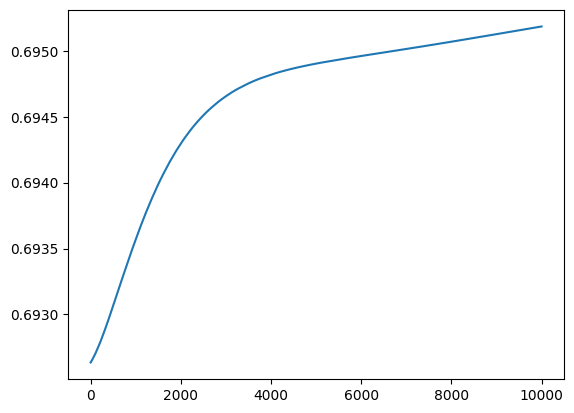

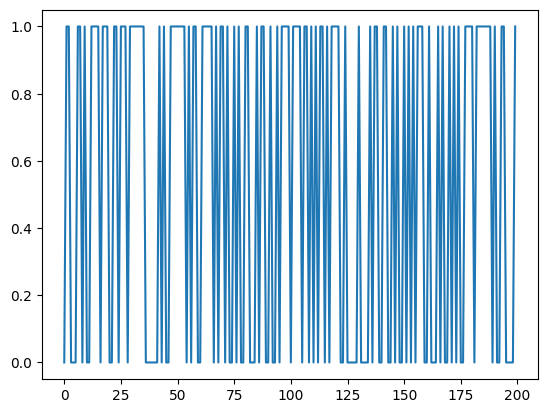

In [ ]:
plt.plot([i.to('cpu') for i in loss_pred])
plt.show()
plt.plot(torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu')-y_test.to('cpu'))
plt.show()

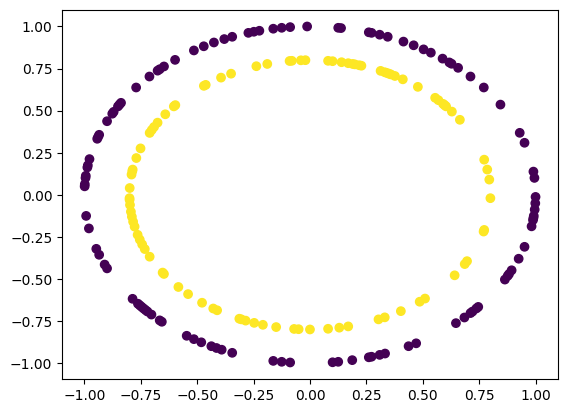

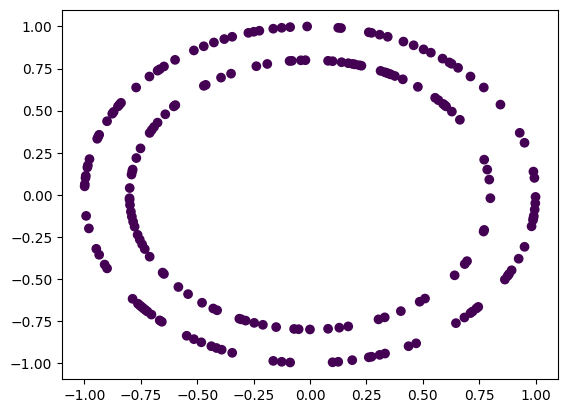

In [ ]:
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=y_test.to('cpu'))
plt.show()
plt.scatter(x_test[:,0].to('cpu'),x_test[:,1].to('cpu'),c=torch.round(torch.sigmoid(y_pred_logits[-1])).to('cpu').to('cpu'))
plt.show()